In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
upload=files.upload()

Saving glass.csv to glass.csv


In [4]:
glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<Axes: >

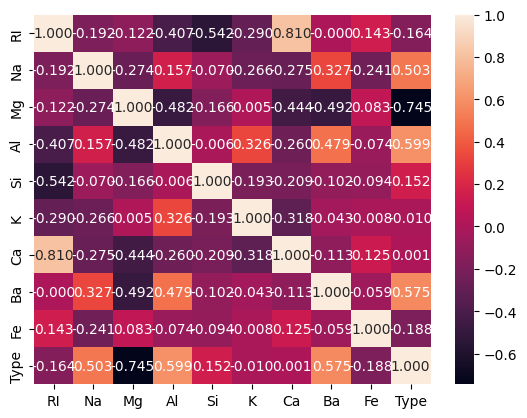

In [8]:
import seaborn as sns
sns.heatmap(glass.corr(),annot=True,fmt='.3f')

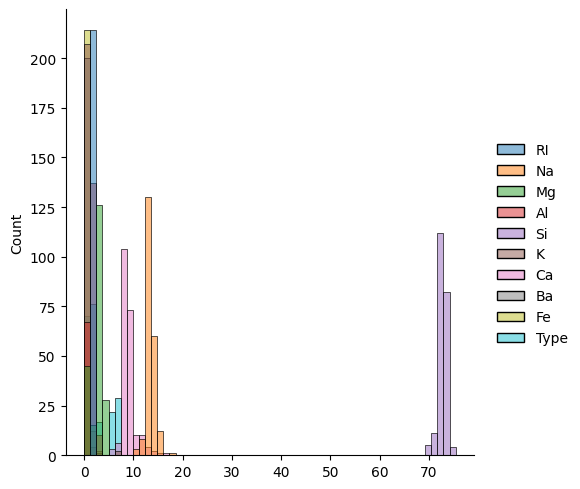

In [9]:
sns.displot(glass)

In [10]:
x=glass.iloc[:,:-1]
y=glass.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [13]:
x_train

array([[ 1.47869653, -0.26856539,  0.76092936, ...,  0.89565825,
        -0.36541712, -0.58652156],
       [ 0.35166708, -0.84217579, -0.57676783, ...,  0.9511415 ,
        -0.36541712, -0.58652156],
       [ 0.08088728, -0.49561951,  0.65642177, ...,  0.1902283 ,
        -0.36541712,  1.01053555],
       ...,
       [-0.00327401,  0.34089565, -1.86569482, ...,  1.66449763,
        -0.36541712, -0.58652156],
       [-0.53019687, -0.67487276,  0.61461873, ..., -0.71335613,
        -0.36541712, -0.58652156],
       [ 0.31507522,  0.67550171, -0.2005405 , ...,  0.53898019,
        -0.36541712, -0.58652156]])

In [14]:
x_test

array([[-0.17275268, -0.63505056,  0.65968719, -0.39959892, -0.02217211,
         0.32521616, -0.28576828, -0.30460914,  2.61842574],
       [ 1.0032351 ,  0.01277306,  0.59776652, -1.53968682, -0.67272778,
        -0.85788831,  0.49801484, -0.30460914, -0.31796694],
       [-0.64978026,  0.36485112,  0.59088644,  0.22473494, -0.15676983,
         0.37254034, -0.66450912, -0.30460914, -0.59325375],
       [-0.37172675,  0.82959416,  0.61152667, -0.07385952,  0.15729153,
        -0.00605309, -0.73289288, -0.30460914, -0.59325375],
       [-0.39723625, -0.69138305,  0.59088644, -0.10100447,  0.48256936,
         0.32521616, -0.33311088, -0.30460914, -0.59325375],
       [ 0.77620058,  1.25208783,  0.73536802, -1.29538227, -1.37936583,
        -0.59760533, -0.04379497, -0.30460914,  2.80195028],
       [-0.19826218, -0.08580879,  0.81792892,  0.06186524, -0.29136756,
         0.15958153, -0.48039899, -0.30460914,  0.32436896],
       [-0.19060933,  0.04093931,  0.43264472,  0.41474959, -0

In [15]:
len(x_train),len(x_test)

(171, 43)

In [16]:
kfold=KFold(n_splits=8)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model=KNeighborsClassifier(n_neighbors=1)
Score=cross_val_score(model,x,y,cv=kfold)
Score

array([0.51851852, 0.55555556, 0.81481481, 0.40740741, 0.40740741,
       0.22222222, 0.        , 0.03846154])

In [20]:
Score.mean()

0.370548433048433

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
from sklearn.metrics import accuracy_score
y_pred=knn.predict(x_test)
KNN_Scores=accuracy_score(y_pred,y_test)
KNN_Scores

0.7209302325581395

## GridSearch

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
import numpy as np
n_neighbors=np.array(range(1,81))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])}

In [25]:
KNN=KNeighborsClassifier()
grid= GridSearchCV(estimator=KNN,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])})

In [26]:
grid.best_score_

0.640531561461794

In [27]:
grid.best_params_

{'n_neighbors': 1}